# Wine dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
#Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Descriptive Summary
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
df.shape

(1599, 12)

In [11]:
#List all Column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#Check missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
#Find duplicate records
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [19]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [20]:
#Remove Duplicates
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [22]:
#Correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

In [23]:
df.corr(method="spearman")

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.280162     0.657387   
volatile acidity          -0.280162          1.000000    -0.610925   
citric acid                0.657387         -0.610925     1.000000   
residual sugar             0.222396          0.031299     0.170096   
chlorides                  0.244095          0.170678     0.110679   
free sulfur dioxide       -0.157857          0.012162    -0.059585   
total sulfur dioxide      -0.083827          0.092548     0.021124   
density                    0.626628          0.032264     0.344303   
pH                        -0.708560          0.245973    -0.558594   
sulphates                  0.220696         -0.324207     0.341512   
alcohol                   -0.062696         -0.225714     0.090798   
quality                    0.111693         -0.387450     0.219427   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.222396   0.244095            -0.157857   
volatile acidity            0.031299   0.170678             0.012162   
citric acid                 0.170096   0.110679            -0.059585   
residual sugar              1.000000   0.215528             0.077652   
chlorides                   0.215528   1.000000             0.010096   
free sulfur dioxide         0.077652   0.010096             1.000000   
total sulfur dioxide        0.141515   0.141324             0.789881   
density                     0.414489   0.420550            -0.025635   
pH                         -0.091543  -0.234452             0.090857   
sulphates                   0.029702   0.033630             0.041320   
alcohol                     0.112205  -0.301525            -0.099386   
quality                     0.025749  -0.204360            -0.058746   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.083827  0.626628 -0.708560   0.220696   
volatile acidity                  0.092548  0.032264  0.245973  -0.324207   
citric acid                       0.021124  0.344303 -0.558594   0.341512   
residual sugar                    0.141515  0.414489 -0.091543   0.029702   
chlorides                         0.141324  0.420550 -0.234452   0.033630   
free sulfur dioxide               0.789881 -0.025635  0.090857   0.041320   
total sulfur dioxide              1.000000  0.137455 -0.029526  -0.008333   
density                           0.137455  1.000000 -0.322763   0.157787   
pH                               -0.029526 -0.322763  1.000000  -0.100048   
sulphates                        -0.008333  0.157787 -0.100048   1.000000   
alcohol                          -0.275353 -0.470019  0.183005   0.207636   
quality                          -0.196620 -0.184302 -0.042738   0.380581   

                       alcohol   quality  
fixed acidity        -0.062696  0.111693  
volatile acidity     -0.225714 -0.387450  
citric acid           0.090798  0.219427  
residual sugar        0.112205  0.025749  
chlorides            -0.301525 -0.204360  
free sulfur dioxide  -0.099386 -0.058746  
total sulfur dioxide -0.275353 -0.196620  
density              -0.470019 -0.184302  
pH                    0.183005 -0.042738  
sulphates             0.207636  0.380581  
alcohol               1.000000  0.487965  
quality               0.487965  1.000000

<AxesSubplot: >

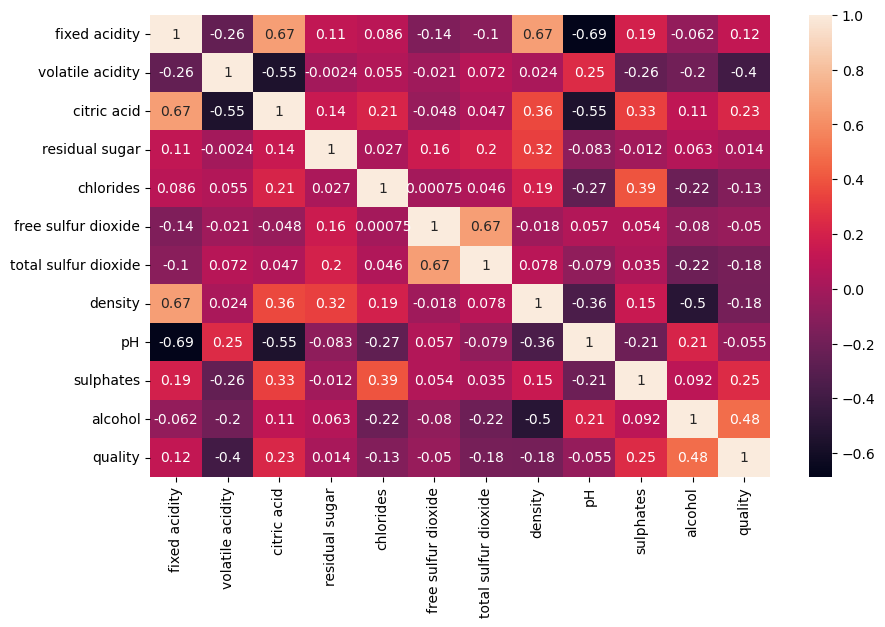

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

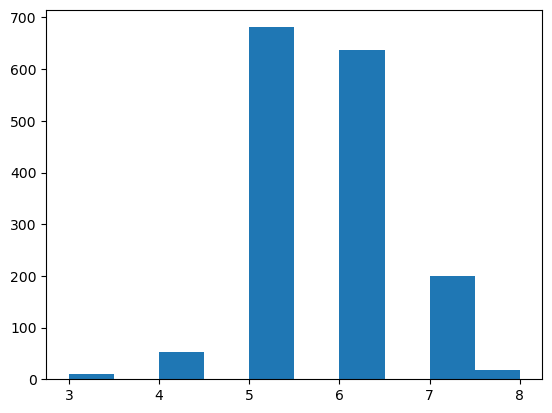

In [14]:
plt.hist(df.quality)

<AxesSubplot: xlabel='quality', ylabel='Count'>

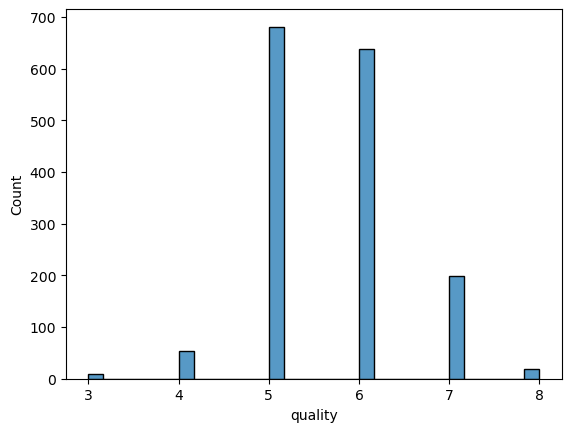

In [15]:
#Imabalanced Dataset
sns.histplot(df.quality, kde=False)

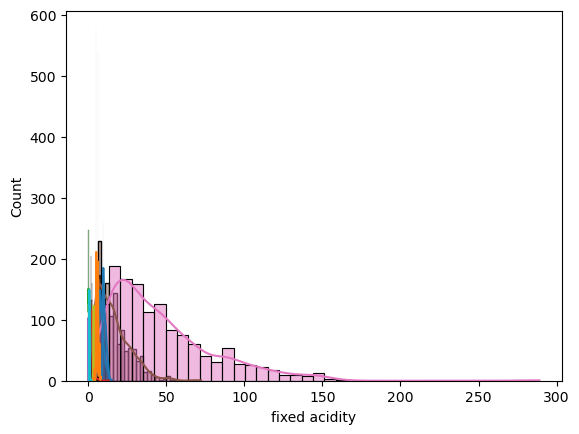

In [33]:
for col in df.columns:
    sns.histplot(df[col], kde=True)

In [41]:
#Univariate, Bivariate, Multivariate Analysis
#sns.pairplot(df)

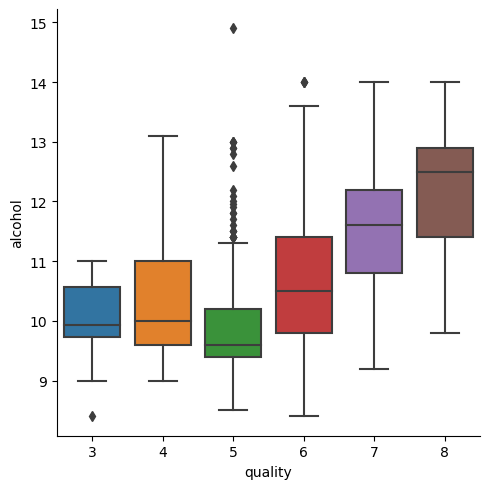

In [40]:
#Categorical Plots
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

<AxesSubplot: xlabel='alcohol', ylabel='pH'>

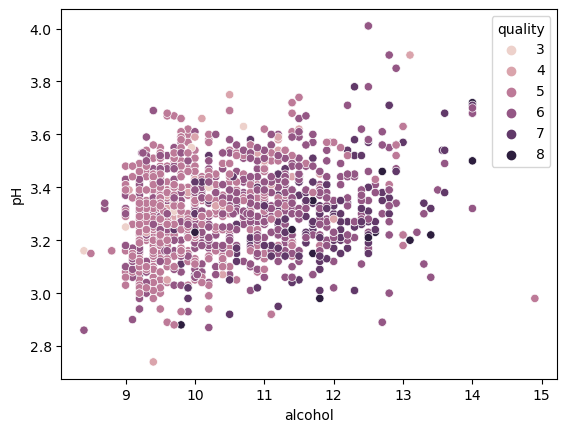

In [32]:
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df)

In [30]:
len(df[df.columns[4]].unique())

153

In [38]:
for i in df.columns:
    print(len(df[i].unique()))

96
143
80
91
153
60
144
436
89
96
65
6


# Student Performance Indicatior

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("stud.csv")
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [3]:
df.shape

(1000, 8)

### Check to perform

1. Missing Values
2. Duplicates
3. Data Types
4. No. of unique values for each columns
5. Statistics of data set
6. Various categories present in different categorical column

In [5]:
# Checking for Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insight

There are no missing values

In [8]:
#Checking Duplicates
df.duplicated().sum()

0

### Insight

No Duplicated values

In [9]:
# DataTypes
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#Checking no. of unique values for each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#Descriptive Statistics
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

### Insights
1. All Means are very close to each other(66 to 69)
2. All Std. Deviations are very close to each other(14 to 16)


In [14]:
#Seggerate Numerical and Categorial Features
num_features = [feat for feat in df.columns if df[feat].dtype!='O']
cat_features = [feat for feat in df.columns if df[feat].dtype=='O']

In [15]:
num_features, cat_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [16]:
# Aggregrate total score with mean
df['Total_Score'] = df.math_score+df.reading_score+df.writing_score
df["Average"] = df.Total_Score/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total_Score    Average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

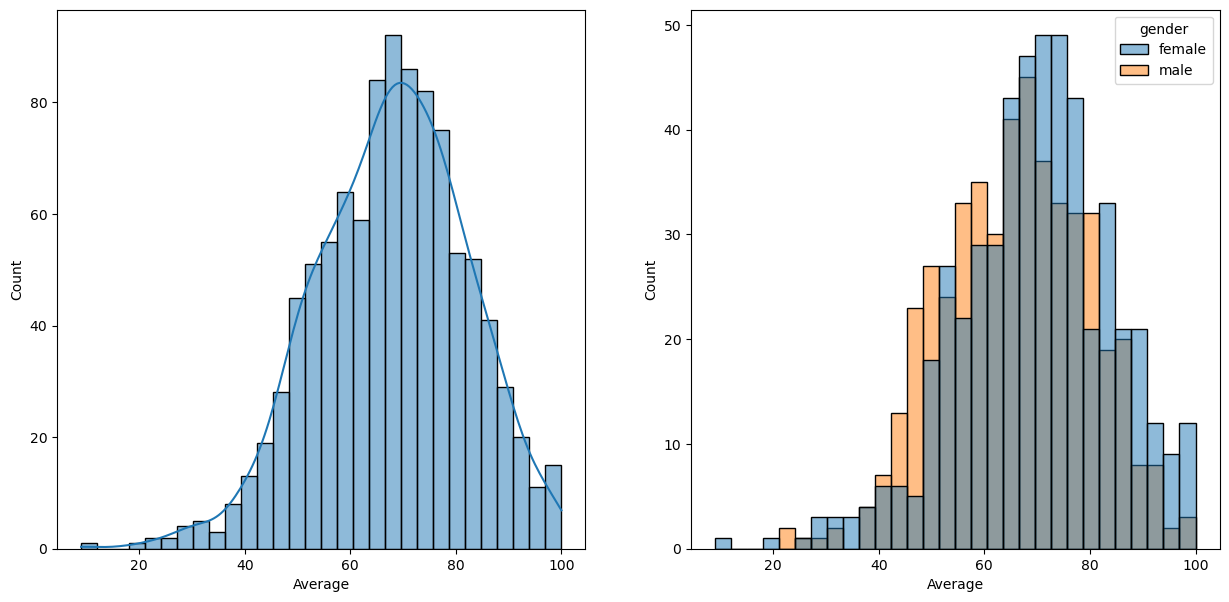

In [21]:
# Explore Visualization
import seaborn as sns
fig, axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True)
plt.subplot(122)
sns.histplot(x=df.Average, bins=30, hue=df.gender)
plt.show()

In [56]:
df.groupby('gender').mean("Average")

math_score  reading_score  writing_score  Total_Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483

In [24]:
# Visualization based on Type of Lunch taken
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

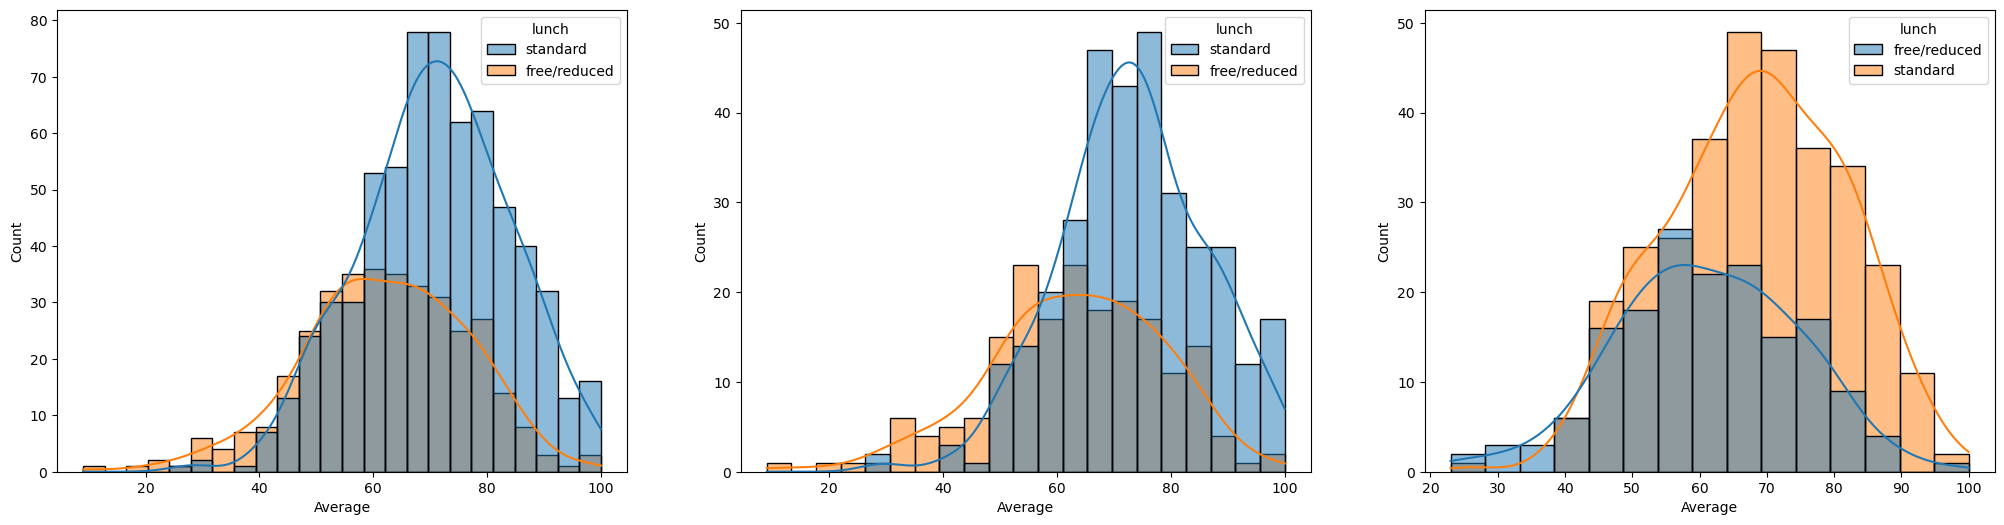

In [36]:
plt.subplots(1, 3, figsize=(25, 6))

#For all Students
plt.subplot(131)
sns.histplot(x=df.Average, kde=True, hue=df.lunch)

#For female students
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average', hue='lunch', kde=True)

#For male students
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average', hue='lunch', kde=True)

plt.show()

## Insights
#### - having standard lunch before exams increases performance fpr both males and females

In [37]:
# Visualization based on Parental Education
df.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

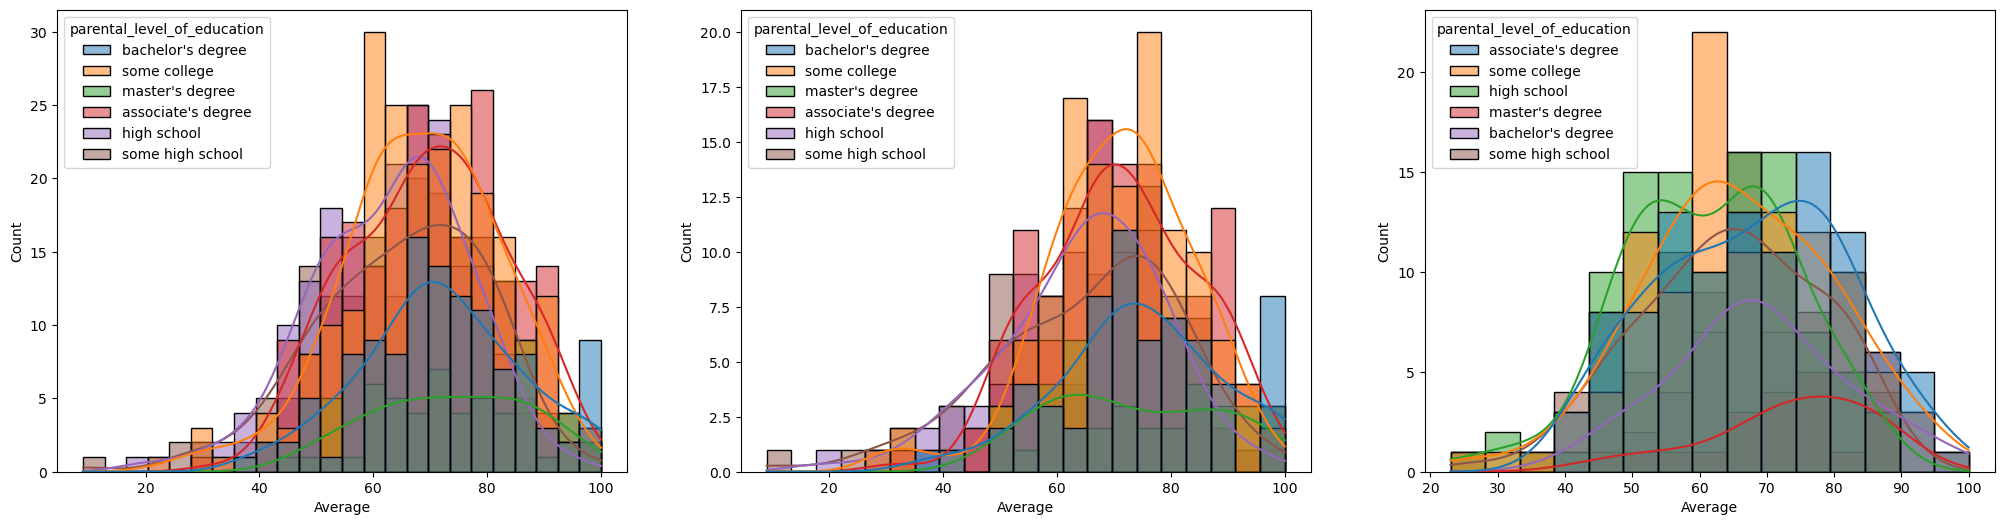

In [38]:
plt.subplots(1, 3, figsize=(25, 6))

#For all Students
plt.subplot(131)
sns.histplot(x=df.Average, kde=True, hue=df.parental_level_of_education	)

#For female students
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average', hue='parental_level_of_education', kde=True)

#For male students
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average', hue='parental_level_of_education', kde=True)

plt.show()

In [59]:
df.groupby('parental_level_of_education').mean("Average").Average

parental_level_of_education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: Average, dtype: float64

In [62]:
df.groupby(['parental_level_of_education', 'gender']).mean("Average").Average

parental_level_of_education  gender
associate's degree           female    71.123563
                             male      67.867925
bachelor's degree            female    74.671958
                             male      68.775758
high school                  female    64.748227
                             male      61.575163
master's degree              female    73.648148
                             male      73.521739
some college                 female    71.002825
                             male      65.716049
some high school             female    65.564103
                             male      64.636364
Name: Average, dtype: float64

In [63]:
df.groupby('race_ethnicity').mean("Average").Average

race_ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: Average, dtype: float64

In [65]:
#sns.pairplot(df)